In [179]:
import numpy as np
import matplotlib.pyplot as plt
import os, glob, re, json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm, SymLogNorm, CenteredNorm
from censai import PowerSpectrum
from argparse import Namespace
import math, json
import matplotlib.pylab as pylab
import h5py
from tqdm import tqdm

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 2000)
pd.set_option('display.max_colwidth', 200)

result_dir = os.path.join(os.getenv("CENSAI_PATH"), "results")
data_path = os.path.join(os.getenv("CENSAI_PATH"), "data")
models_path = os.path.join(os.getenv("CENSAI_PATH"), "models")

params = {'legend.fontsize': 27,
#           'figure.figsize': (10, 10),
         'axes.labelsize': 27,
         'axes.titlesize': 30,#'x-large',
         'xtick.labelsize':20,
         'ytick.labelsize':20,
         }
pylab.rcParams.update(params)
plt.style.use("science")

In [2]:
# model = "RIMSU512_k128_NIE2nsvdO_033_TS10_F16_L5_IK11_NLrelu_al0.04_GAplus_42_B10_lr0.0005_dr0.8_ds5000_TWquadratic_210923032150"
# model = "RIMSU512_hk128_TNG2nsO_008_F16_IK7_NLrelu_82_B10_lr0.0005_dr0.5_ds10000_211005114812"
model = "RIMSU128_hTNG2nsvdO_Sinit1_001_F16_IK11_NLleaky_relu_128_211012121338"
path = os.path.join(os.getenv("CENSAI_PATH"), "data", "rim_predictions", model, "prediction.h5")
hf = h5py.File(path, 'r')

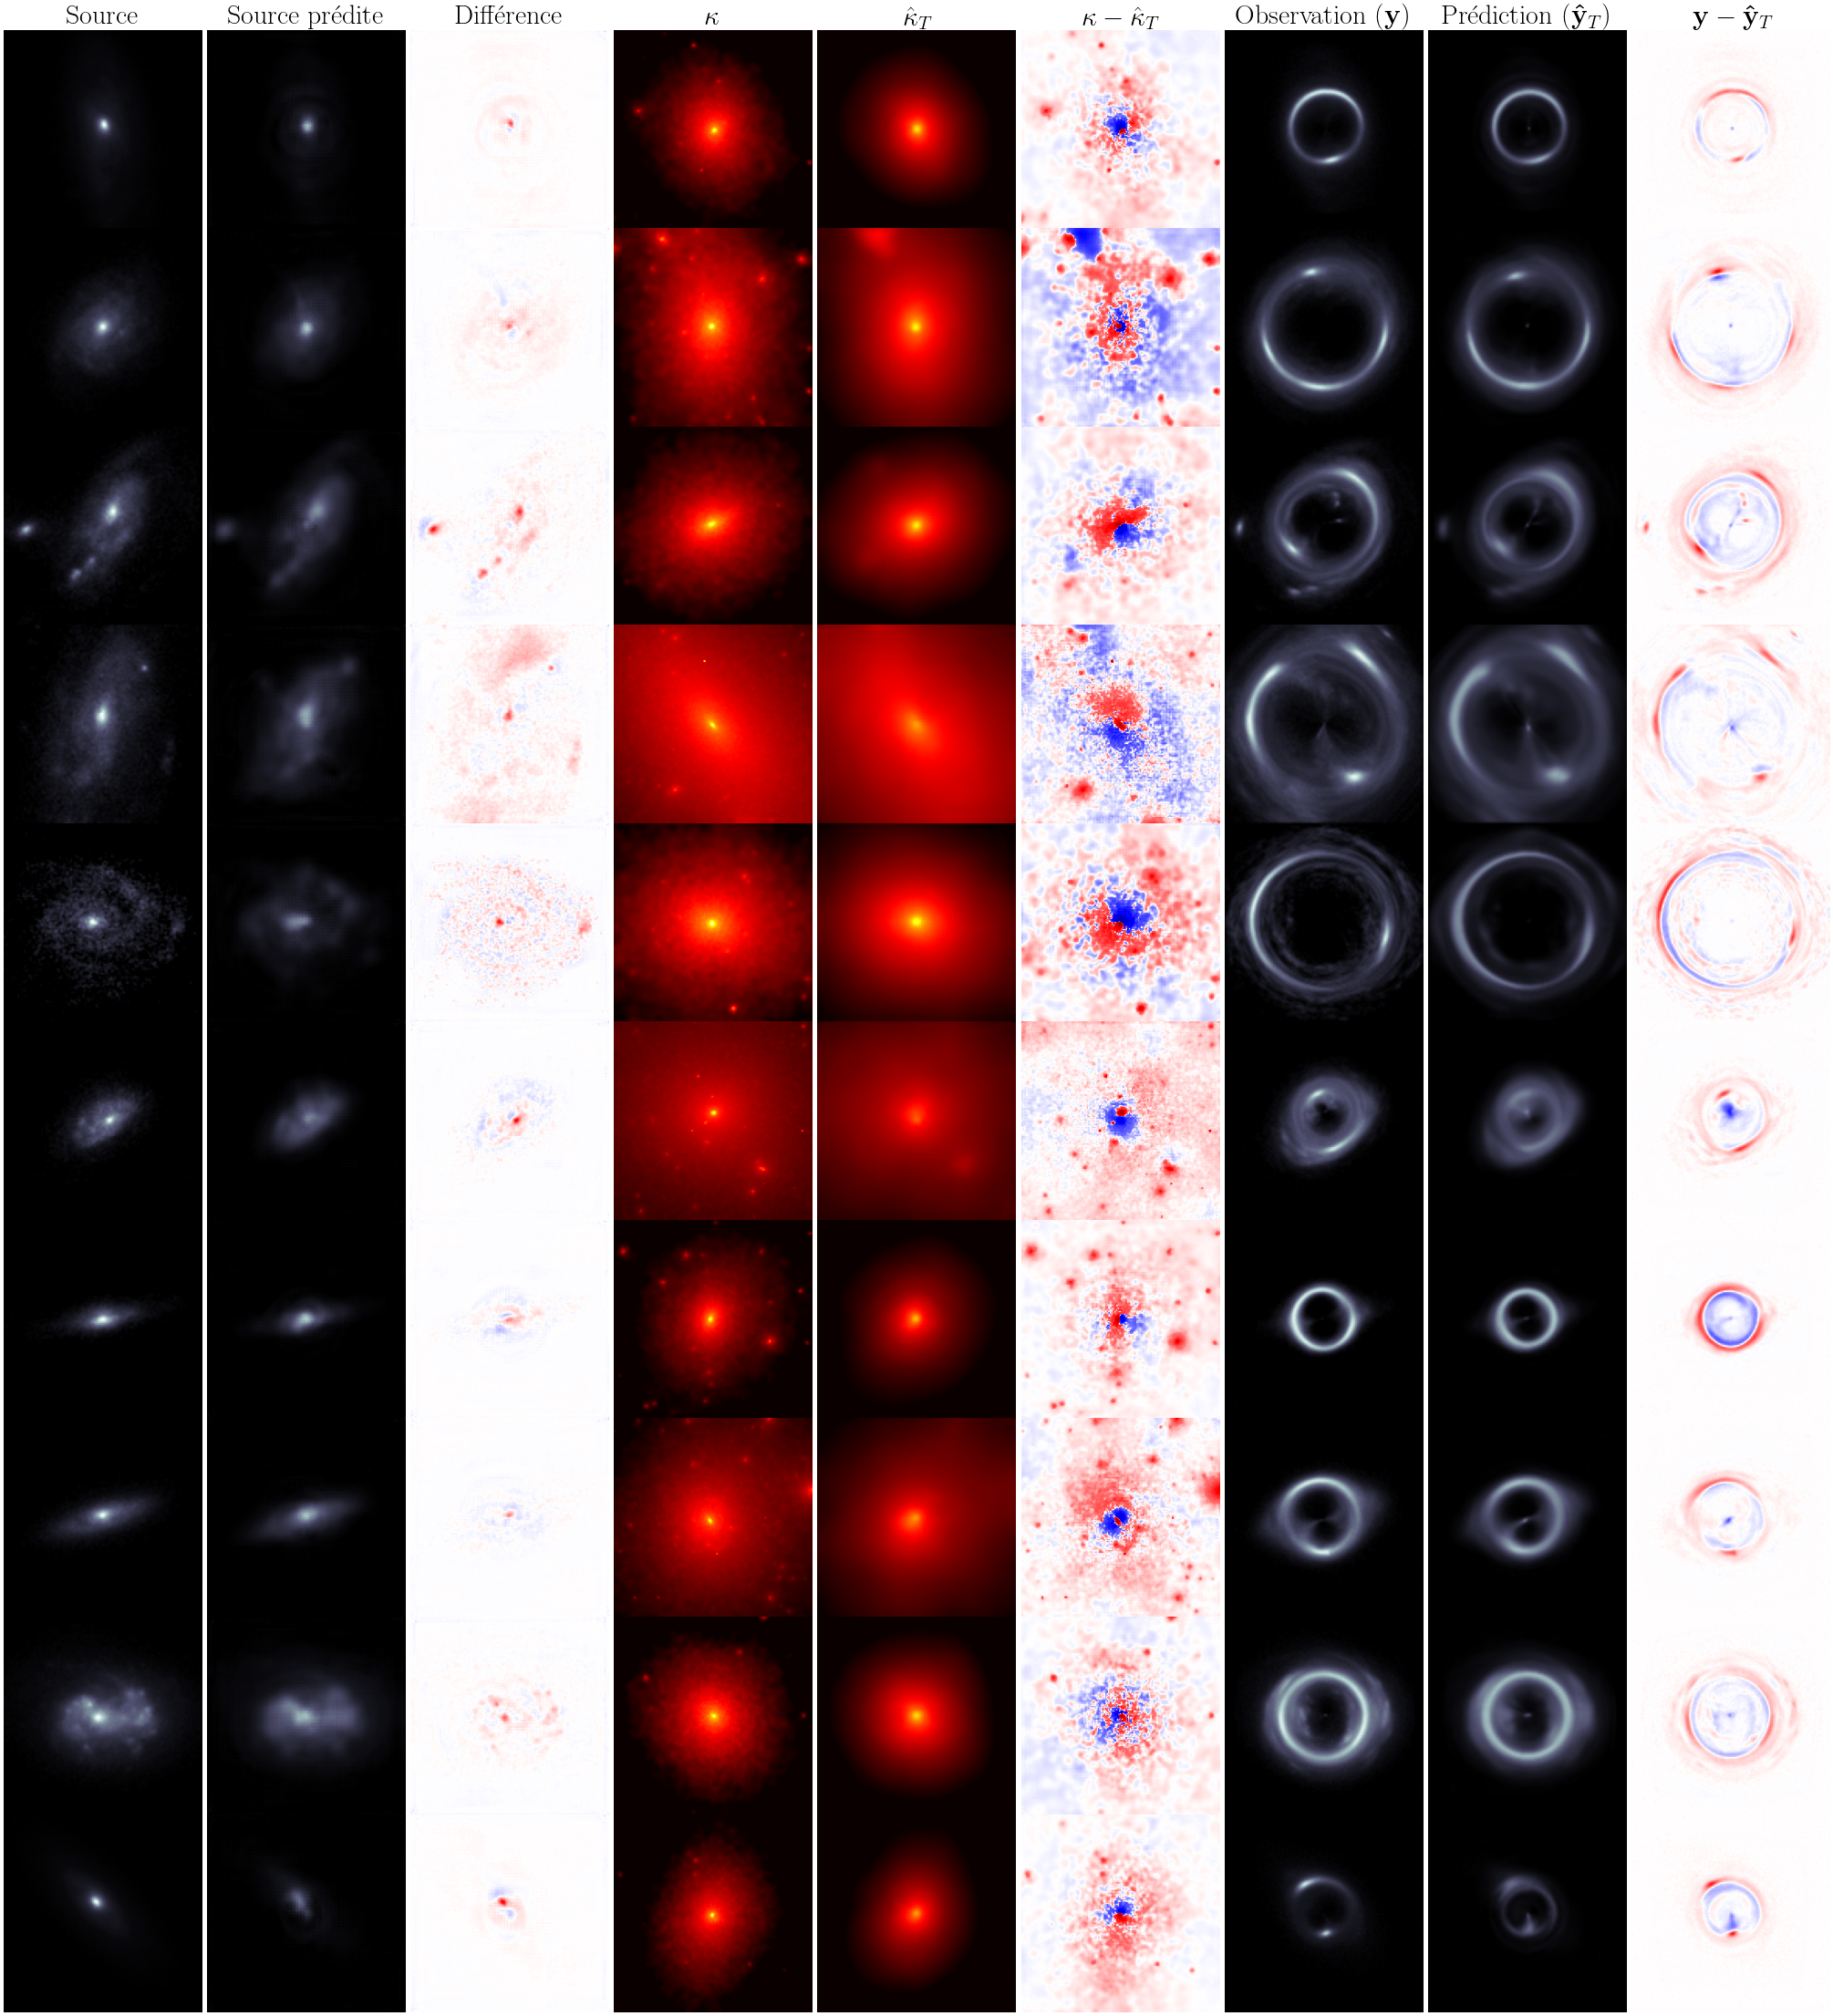

In [166]:
N = 10
start = 120

fig, axs = plt.subplots(N, 9, figsize=(36, 4 * N))
for i in range(N):
    k = i + start
    lens = np.array(hf[f"data{k:03d}/lens"]).squeeze()
    source = np.array(hf[f"data{k:03d}/source"]).squeeze()
    kappa = np.array(hf[f"data{k:03d}/kappa"]).squeeze()
    lens_pred = np.array(hf[f"data{k:03d}/lens_pred"]).squeeze()
    source_pred = np.array(hf[f"data{k:03d}/source_pred"]).squeeze()[-1]
    kappa_pred = np.array(hf[f"data{k:03d}/kappa_pred"]).squeeze()[-1]
    

    axs[i, 0].imshow(source, cmap="bone", vmin=0, vmax=1, origin="lower")
    axs[i, 1].imshow(source_pred, cmap="bone", vmin=0, vmax=1, origin="lower")
    axs[i, 2].imshow(source - source_pred, cmap="seismic", vmin=-1, vmax=1, origin="lower")
    
    axs[i, 3].imshow(kappa, cmap="hot", norm=LogNorm(vmin=1e-1, vmax=100), origin="lower")
    axs[i, 4].imshow(kappa_pred, cmap="hot", norm=LogNorm(vmin=1e-1, vmax=100), origin="lower")
    axs[i, 5].imshow(kappa - kappa_pred, cmap="seismic", norm=SymLogNorm(linthresh=1e-1, base=10, vmax=100, vmin=-100), origin="lower")
    
    axs[i, 6].imshow(lens, cmap="bone", vmin=0, vmax=1, origin="lower")
    axs[i, 7].imshow(lens_pred, cmap="bone", vmin=0, vmax=1, origin="lower")
    axs[i, 8].imshow(lens - lens_pred, cmap="seismic", vmin=-1, vmax=1, origin="lower")
    
for i in range(N):
    for j in range(9):
        axs[i, j].axis("off")


axs[0, 0].set_title("Source")
axs[0, 1].set_title("Source prédite")
axs[0, 2].set_title("Différence")
axs[0, 3].set_title("$\kappa$")
axs[0, 4].set_title("$\hat{\kappa}_T$")
axs[0, 5].set_title("$\kappa - \hat{\kappa}_T$")
axs[0, 6].set_title("Observation ($\mathbf{y}$)")
axs[0, 7].set_title("Prédiction ($\mathbf{\hat{y}}_T$)")
axs[0, 8].set_title("$\mathbf{y} - \mathbf{\hat{y}}_T$")
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig(f"../results/rim_pred{start:d}.png")

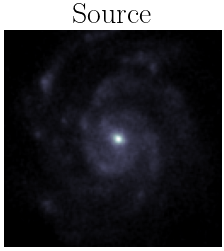

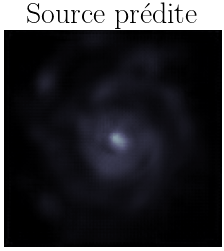

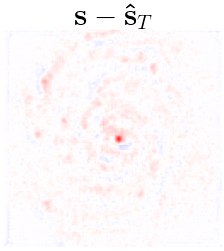

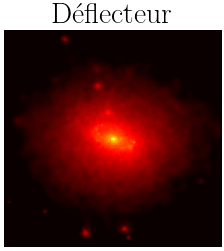

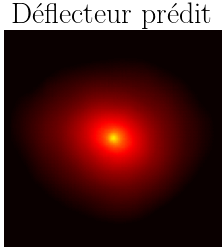

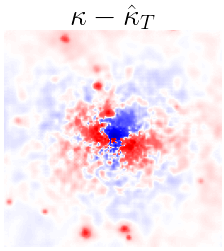

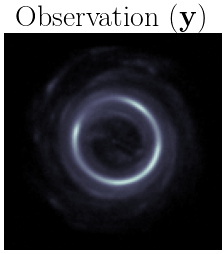

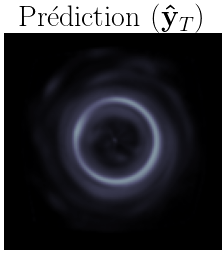

<Figure size 288x288 with 0 Axes>

In [171]:
k = 161

lens = np.array(hf[f"data{k:03d}/lens"]).squeeze()
source = np.array(hf[f"data{k:03d}/source"]).squeeze()
kappa = np.array(hf[f"data{k:03d}/kappa"]).squeeze()
lens_pred = np.array(hf[f"data{k:03d}/lens_pred"]).squeeze()
source_pred = np.array(hf[f"data{k:03d}/source_pred"]).squeeze()[-1]
kappa_pred = np.array(hf[f"data{k:03d}/kappa_pred"]).squeeze()[-1]

plt.figure(figsize=(4, 4))
plt.imshow(source, cmap="bone", origin="lower", vmin=0, vmax=1)
plt.title("Source")
plt.axis("off")
plt.savefig(f"../results/source_true_{k:02d}.png")

plt.figure(figsize=(4, 4))
plt.imshow(source_pred, cmap="bone", origin="lower", vmin=0., vmax=1)
plt.title("Source prédite")
plt.axis("off")
plt.savefig(f"../results/source_pred_{k:02d}.png")

plt.figure(figsize=(4, 4))
plt.imshow(source - source_pred, cmap="seismic", vmin=-1, vmax=1, origin="lower")
plt.title(r"$\mathbf{s} - \mathbf{\hat{s}}_T$")
plt.axis("off")
plt.savefig(f"../results/source_residuals_{k:02d}.png")

plt.figure(figsize=(4, 4))
plt.imshow(kappa, cmap="hot", norm=LogNorm(vmin=1e-1, vmax=100), origin="lower")
plt.title("Déflecteur")
plt.axis("off")
plt.savefig(f"../results/kappa_true_{k:02d}.png")


plt.figure(figsize=(4, 4))
plt.imshow(kappa_pred, cmap="hot", norm=LogNorm(vmin=1e-1, vmax=100), origin="lower")
plt.title("Déflecteur prédit")
plt.axis("off")
plt.savefig(f"../results/kappa_pred_{k:02d}.png")


plt.figure(figsize=(4, 4))
plt.imshow(kappa - kappa_pred, cmap="seismic", norm=SymLogNorm(linthresh=1e-1, base=10, vmax=100, vmin=-100), origin="lower")
plt.title("$\kappa - \hat{\kappa}_T$")
plt.axis("off")
plt.savefig(f"../results/kappa_residuals_{k:02d}.png")

plt.figure(figsize=(4, 4))
plt.imshow(lens, cmap="bone", origin="lower", vmin=0, vmax=1)
plt.title(r"Observation ($\mathbf{y}$)")
plt.axis("off")
plt.savefig(f"../results/lens_true_{k:02d}.png")

plt.figure(figsize=(4, 4))
plt.imshow(lens_pred, cmap="bone", origin="lower", vmin=0, vmax=1)
plt.title(r"Prédiction ($\mathbf{\hat{y}}_T$)")
plt.axis("off")
plt.savefig(f"../results/lens_pred_{k:02d}.png")

plt.figure(figsize=(4, 4))
plt.imshow(lens - lens_pred, cmap="seismic", vmin=-1., vmax=1, origin="lower")
plt.title("$\mathbf{y} - \mathbf{\hat{y}}_T$")
plt.axis("off")
plt.savefig(f"../results/lens_residuals_{k:02d}.png")

plt.clf()

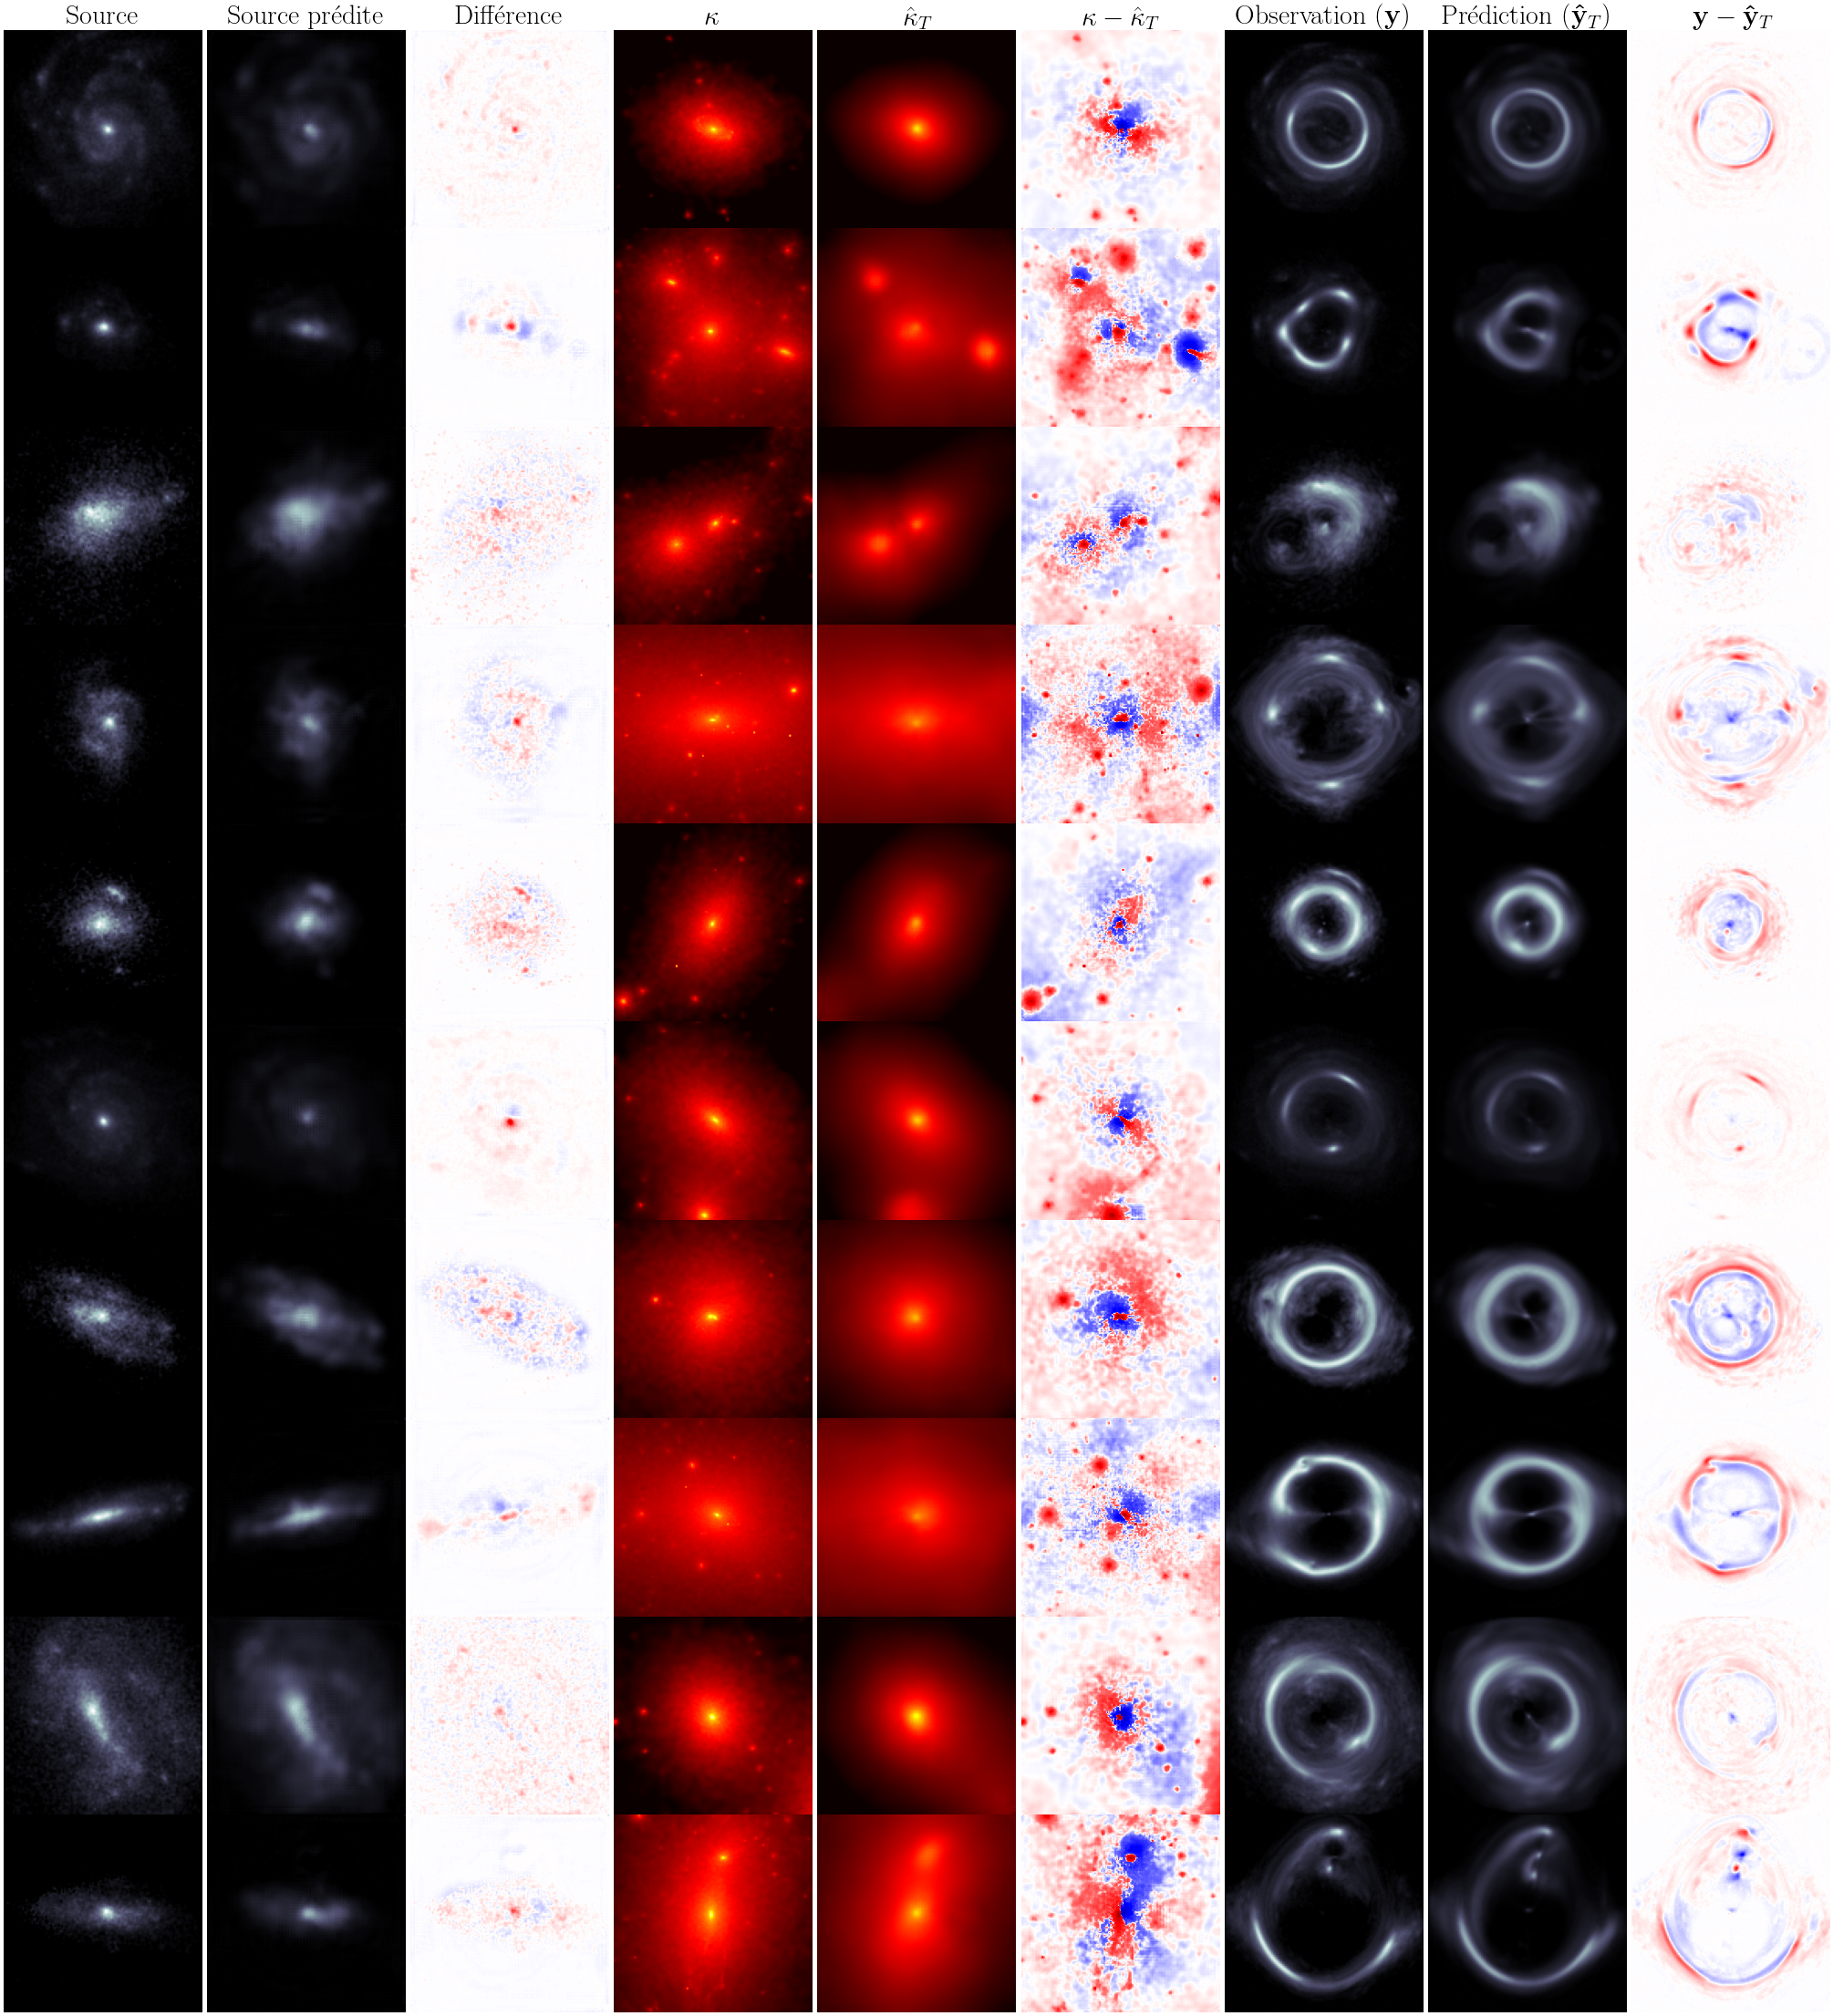

In [48]:
# indexes = [9, 58, 10, 29, 59, 36, 12, 51]
indexes = [161, 1, 5, 15, 16, 19, 23, 71, 78, 98]
N = len(indexes)

fig, axs = plt.subplots(N, 9, figsize=(36, 4 * N))
for i, k in enumerate(indexes):
    lens = np.array(hf[f"data{k:03d}/lens"]).squeeze()
    source = np.array(hf[f"data{k:03d}/source"]).squeeze()
    kappa = np.array(hf[f"data{k:03d}/kappa"]).squeeze()
    lens_pred = np.array(hf[f"data{k:03d}/lens_pred"]).squeeze()
    source_pred = np.array(hf[f"data{k:03d}/source_pred"]).squeeze()[-1]
    kappa_pred = np.array(hf[f"data{k:03d}/kappa_pred"]).squeeze()[-1]


    axs[i, 0].imshow(source, cmap="bone", vmin=0, vmax=1, origin="lower")
    axs[i, 1].imshow(source_pred, cmap="bone", vmin=0, vmax=1, origin="lower")
    axs[i, 2].imshow(source - source_pred, cmap="seismic", vmin=-1, vmax=1, origin="lower")
    
    axs[i, 3].imshow(kappa, cmap="hot", norm=LogNorm(vmin=1e-1, vmax=100), origin="lower")
    axs[i, 4].imshow(kappa_pred, cmap="hot", norm=LogNorm(vmin=1e-1, vmax=100), origin="lower")
    axs[i, 5].imshow(kappa - kappa_pred, cmap="seismic", norm=SymLogNorm(linthresh=1e-1, base=10, vmax=100, vmin=-100), origin="lower")
    
    axs[i, 6].imshow(lens, cmap="bone", vmin=0, vmax=1, origin="lower")
    axs[i, 7].imshow(lens_pred, cmap="bone", vmin=0, vmax=1, origin="lower")
    axs[i, 8].imshow(lens - lens_pred, cmap="seismic", vmin=-1, vmax=1, origin="lower")
    
for i in range(N):
    for j in range(9):
        axs[i, j].axis("off")


axs[0, 0].set_title("Source")
axs[0, 1].set_title("Source prédite")
axs[0, 2].set_title("Différence")
axs[0, 3].set_title("$\kappa$")
axs[0, 4].set_title("$\hat{\kappa}_T$")
axs[0, 5].set_title("$\kappa - \hat{\kappa}_T$")
axs[0, 6].set_title("Observation ($\mathbf{y}$)")
axs[0, 7].set_title("Prédiction ($\mathbf{\hat{y}}_T$)")
axs[0, 8].set_title("$\mathbf{y} - \mathbf{\hat{y}}_T$")
plt.subplots_adjust(wspace=0, hspace=0);
plt.savefig("poster_main_fig.png")

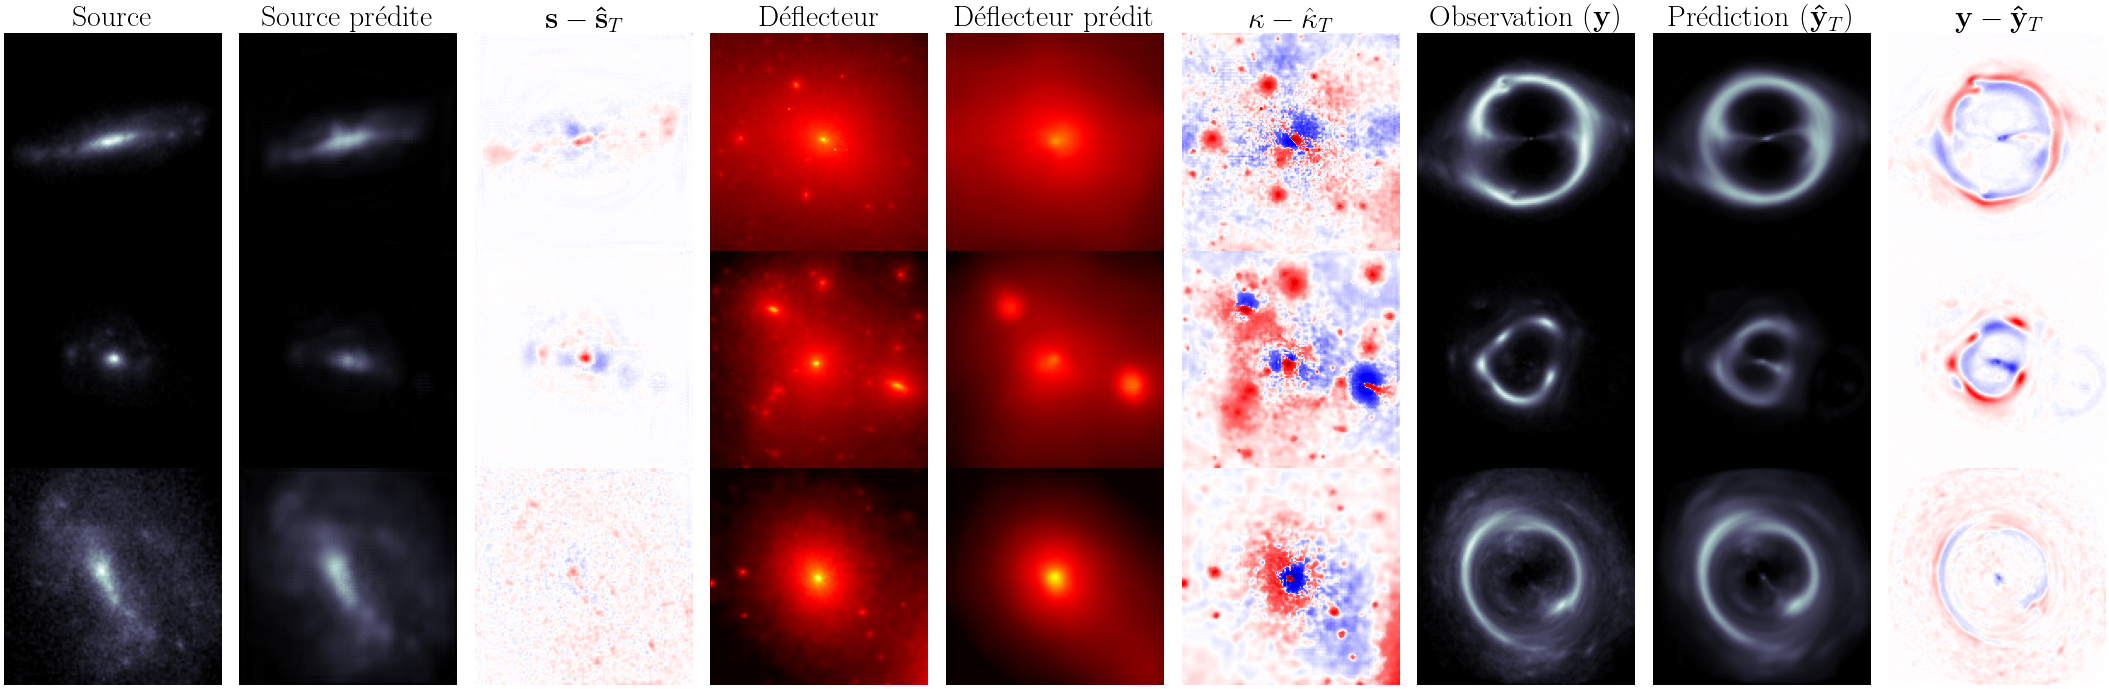

In [170]:
N = 3
indexes = [71, 1, 78]

fig, axs = plt.subplots(N, 9, figsize=(36+2, 4 * N))
for i, k in enumerate(indexes):
    lens = np.array(hf[f"data{k:03d}/lens"]).squeeze()
    source = np.array(hf[f"data{k:03d}/source"]).squeeze()
    kappa = np.array(hf[f"data{k:03d}/kappa"]).squeeze()
    lens_pred = np.array(hf[f"data{k:03d}/lens_pred"]).squeeze()
    source_pred = np.array(hf[f"data{k:03d}/source_pred"]).squeeze()[-1]
    kappa_pred = np.array(hf[f"data{k:03d}/kappa_pred"]).squeeze()[-1]
    

    axs[i, 0].imshow(source, cmap="bone",  vmin=0, vmax=1, origin="lower")
    axs[i, 1].imshow(source_pred, cmap="bone", vmin=0, vmax=1, origin="lower")
    axs[i, 2].imshow(source - source_pred, cmap="seismic", vmin=-1, vmax=1, origin="lower")
    
    axs[i, 3].imshow(kappa, cmap="hot", norm=LogNorm(vmin=1e-1, vmax=100), origin="lower")
    axs[i, 4].imshow(kappa_pred, cmap="hot", norm=LogNorm(vmin=1e-1, vmax=100), origin="lower")
    axs[i, 5].imshow(kappa - kappa_pred, cmap="seismic", norm=SymLogNorm(linthresh=1e-1, base=10, vmax=100, vmin=-100), origin="lower")
    
    axs[i, 6].imshow(lens, cmap="bone",  vmin=0, vmax=1,origin="lower")
    axs[i, 7].imshow(lens_pred, cmap="bone",  vmin=0, vmax=1,origin="lower")
    axs[i, 8].imshow(lens - lens_pred, cmap="seismic", vmin=-1, vmax=1, origin="lower")
    
for i in range(N):
    for j in range(9):
        axs[i, j].axis("off")


axs[0, 0].set_title("Source")
axs[0, 1].set_title("Source prédite")
axs[0, 2].set_title("$\mathbf{s} - \mathbf{\hat{s}}_T$")
axs[0, 3].set_title("Déflecteur")
axs[0, 4].set_title("Déflecteur prédit")
axs[0, 5].set_title("$\kappa - \hat{\kappa}_T$")
axs[0, 6].set_title("Observation ($\mathbf{y}$)")
axs[0, 7].set_title("Prédiction ($\mathbf{\hat{y}}_T$)")
axs[0, 8].set_title("$\mathbf{y} - \mathbf{\hat{y}}_T$")
plt.subplots_adjust(wspace=0, hspace=0);
plt.savefig("poster_main_fig2")

In [77]:
ps_lens = PowerSpectrum(bins=60, pixels=128)
ps_kappa_source = PowerSpectrum(bins=60, pixels=128)

r_lens = []
r_kappa = []
r_source = []
i = 0
for k in tqdm(range(1000)):
    lens = np.array(hf[f"data{k:03d}/lens"]).squeeze()[None, ...]
    source = np.array(hf[f"data{k:03d}/source"]).squeeze()[None, ...]
    kappa = np.array(hf[f"data{k:03d}/kappa"]).squeeze()[None, ...]
    lens_pred = np.array(hf[f"data{k:03d}/lens_pred"]).squeeze()[None, ...]
    source_pred = np.array(hf[f"data{k:03d}/source_pred"]).squeeze()[-1][None, ...]
    kappa_pred = np.array(hf[f"data{k:03d}/kappa_pred"]).squeeze()[-1][None, ...]
    
    r_lens.append(ps_lens.cross_correlation_coefficient(lens, lens_pred))
    r_kappa.append(ps_kappa_source.cross_correlation_coefficient(np.log10(kappa), np.log10(kappa_pred)))
    r_source.append(ps_kappa_source.cross_correlation_coefficient(source, source_pred))

100%|██████████| 1000/1000 [08:14<00:00,  2.02it/s]


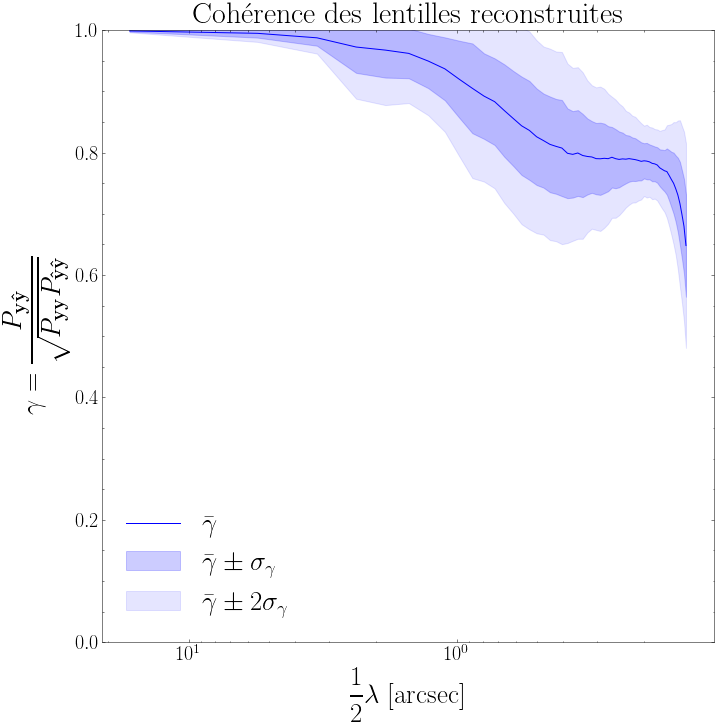

In [180]:
r = np.concatenate(r_lens)
color = "b"
ps = ps_lens
fov = 17.425909

r_mean = r.mean(axis=0)
r_std = r.std(axis=0)
_, f = np.histogram(np.fft.fftfreq(128)[:64], bins=ps.bins)
f = (f[:-1] + f[1:])/2 / fov * ps.pixels
lam = 1/f/2
fig = plt.figure(figsize=(10, 10))
ax = fig.add_axes([0.1, 0.1, 0.85, 0.85])
ax.plot(lam, r_mean, "-", color=color, label=r"$\bar{\gamma}$")
ax.fill_between(lam, r_mean - r_std, r_mean + r_std, color=color, alpha=0.2, label=r"$\bar{\gamma} \pm \sigma_\gamma$")
ax.fill_between(lam, r_mean - 2 * r_std, r_mean + 2 * r_std, color=color, alpha=0.1, label=r"$\bar{\gamma} \pm 2\sigma_\gamma$")
ax.set_xlabel(r"$\dfrac{1}{2}\lambda$ [arcsec]")
plt.gca().invert_xaxis()
plt.xscale("log")
plt.ylim(0, 1)
# plt.xlim(128, 3)
plt.legend(loc="lower left")
ax.set_ylabel(r"$\gamma = \dfrac{P_{\mathbf{y}\mathbf{\hat{y}}}}{\sqrt{P_{\mathbf{y}\mathbf{y}} P_{\mathbf{\hat{y}}\mathbf{\hat{y}}}}}$")
plt.title("Cohérence des lentilles reconstruites");
plt.savefig(f"../results/{model}_lens_cross_correlation.png")

Text(0.5, 1.0, 'Corrélation croisée des déflecteur')

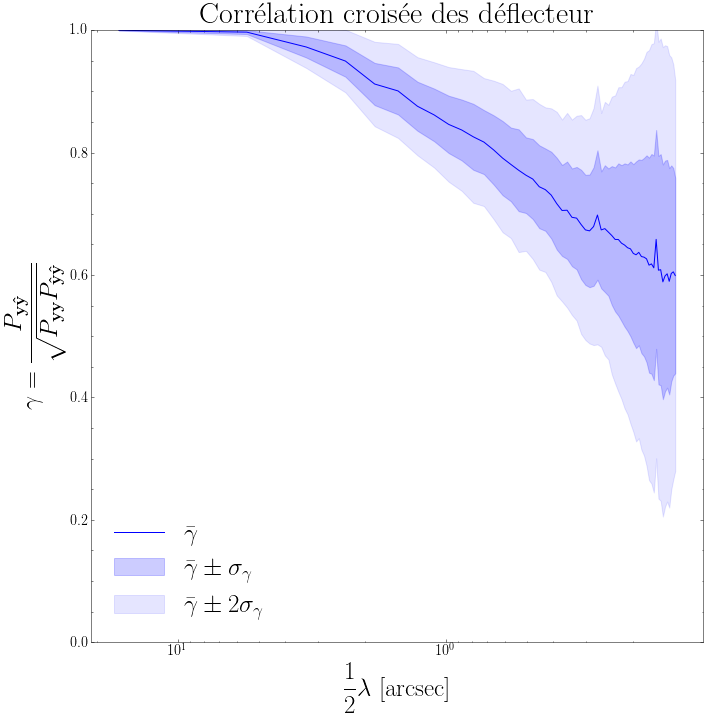

In [148]:
r = np.concatenate(r_kappa)
color = "b"
ps = ps_kappa_source
fov = 17.425909


r_mean = r.mean(axis=0)
r_std = r.std(axis=0)
_, f = np.histogram(np.fft.fftfreq(128)[:64], bins=ps.bins)
f = (f[:-1] + f[1:])/2 / fov * ps.pixels
lam = 1/f/2
fig = plt.figure(figsize=(10, 10))
ax = fig.add_axes([0.1, 0.1, 0.85, 0.85])
ax.plot(lam, r_mean, "-", color=color, label=r"$\bar{\gamma}$")
ax.fill_between(lam, r_mean - r_std, r_mean + r_std, color=color, alpha=0.2, label=r"$\bar{\gamma} \pm \sigma_\gamma$")
ax.fill_between(lam, r_mean - 2 * r_std, r_mean + 2 * r_std, color=color, alpha=0.1, label=r"$\bar{\gamma} \pm 2\sigma_\gamma$")
ax.set_xlabel(r"$\dfrac{1}{2}\lambda$ [arcsec]")
plt.gca().invert_xaxis()
plt.xscale("log")
plt.ylim(0, 1)
# plt.xlim(128, 3)
plt.legend(loc="lower left")
ax.set_ylabel(r"$\gamma = \dfrac{P_{\mathbf{y}\mathbf{\hat{y}}}}{\sqrt{P_{\mathbf{y}\mathbf{y}} P_{\mathbf{\hat{y}}\mathbf{\hat{y}}}}}$")
plt.title("Corrélation croisée des déflecteur")


Text(0.5, 1.0, 'Corrélation croisée des sources')

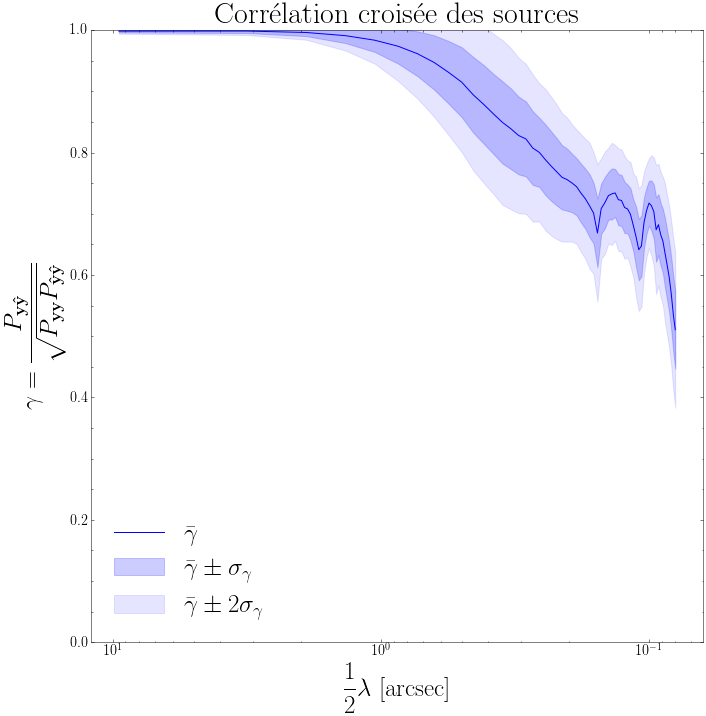

In [149]:
r = np.concatenate(r_source)
color = "b"
ps = ps_kappa_source
fov = 10


r_mean = r.mean(axis=0)
r_std = r.std(axis=0)
_, f = np.histogram(np.fft.fftfreq(128)[:64], bins=ps.bins)
f = (f[:-1] + f[1:])/2 / fov * ps.pixels
lam = 1/f/2
fig = plt.figure(figsize=(10, 10))
ax = fig.add_axes([0.1, 0.1, 0.85, 0.85])
ax.plot(lam, r_mean, "-", color=color, label=r"$\bar{\gamma}$")
ax.fill_between(lam, r_mean - r_std, r_mean + r_std, color=color, alpha=0.2, label=r"$\bar{\gamma} \pm \sigma_\gamma$")
ax.fill_between(lam, r_mean - 2 * r_std, r_mean + 2 * r_std, color=color, alpha=0.1, label=r"$\bar{\gamma} \pm 2\sigma_\gamma$")
ax.set_xlabel(r"$\dfrac{1}{2}\lambda$ [arcsec]")
plt.gca().invert_xaxis()
plt.xscale("log")
plt.ylim(0, 1)
# plt.xlim(128, 3)
plt.legend(loc="lower left")
ax.set_ylabel(r"$\gamma = \dfrac{P_{\mathbf{y}\mathbf{\hat{y}}}}{\sqrt{P_{\mathbf{y}\mathbf{y}} P_{\mathbf{\hat{y}}\mathbf{\hat{y}}}}}$")
plt.title("Corrélation croisée des sources")
